# Subset data
- I will subset data by taking only the ACTIVE users
- Then I will take most frequent package he used -> to make this success
- Make any additional cleaning 
- save data 
- build model

In [1]:
import pandas as pd

In [15]:
df = pd.read_csv(r"\data\golden_layer.csv")
df.head()

,AGE,PERSON_TYPE,GENDER,GX,PT,FT90_P,NO_PRGRAM,TOT_SUBS,REJOIN_CNT,RENEWAL_CNT,...,DAYS_1_PKG,OUTAGE,SUBS_DAYS,OUTAGE_PERC,OUTAGE_TILLNOW,CENTER_REGION_CHANGE,CITY_CHANGE,CHURN,CITY,CENTER_REGION
0,29.0,1,0,1,0,1,1,6,1,4,...,0,433,1872,1.983,200991,1,1,1,0.236589,0.241151
1,36.0,0,0,1,0,0,1,3,0,2,...,0,4,629,0.023,99676,0,1,0,0.173828,0.194171
2,28.0,0,0,0,0,0,0,5,4,1,...,0,597,1231,3.287,190931,1,1,0,0.236589,0.241151
3,30.0,0,0,0,0,0,0,2,1,0,...,0,17,239,0.081,60576,0,0,0,0.206264,0.194171
4,50.0,0,0,1,1,1,1,5,2,2,...,0,57,1681,0.261,120305,0,0,1,0.203128,0.202731


In [4]:
df.shape

(1749892, 33)

In [16]:
# ACTIVE -> 1 -> not churn
df_active = df[df["CHURN"]==1]
df_active.shape

(400162, 33)

In [8]:
df_active.columns

Index(['AGE', 'PERSON_TYPE', 'GENDER', 'GX', 'PT', 'FT90_P', 'NO_PRGRAM',
       'TOT_SUBS', 'REJOIN_CNT', 'RENEWAL_CNT', 'NEWSALE_CNT', 'FT_CENTER',
       'PRO_CENTER', 'PLUS_CENTER', 'XPRESS_CENTER', 'POPUP_CENTER',
       'HQ_CENTER', 'NO_OF_PRODUCTS', 'MONTH_12_PKG', 'MONTH_9_PKG',
       'MONTH_6_PKG', 'MONTH_3_PKG', 'MONTH_1_PKG', 'DAYS_1_PKG', 'OUTAGE',
       'SUBS_DAYS', 'OUTAGE_PERC', 'OUTAGE_TILLNOW', 'CENTER_REGION_CHANGE',
       'CITY_CHANGE', 'CHURN', 'CITY', 'CENTER_REGION'],
      dtype='object')

In [17]:
# Function to get the most active package for each record
def get_most_active_package(df):
    # Define the order of preference when there are ties
    columns = ['MONTH_12_PKG', 'MONTH_9_PKG', 'MONTH_6_PKG', 'MONTH_3_PKG', 'MONTH_1_PKG', 'DAYS_1_PKG']
    order_of_preference = ['MONTH_12_PKG', 'MONTH_9_PKG', 'MONTH_6_PKG', 'MONTH_3_PKG', 'MONTH_1_PKG', 'DAYS_1_PKG']

    # Find the column with the max value for each row
    df['MOST_ACTIVE_PKG'] = df[columns].idxmax(axis=1)
    
    # In case of ties, use the order of preference
    for idx, row in df.iterrows():
        max_value = row[columns].max()
        equal_columns = [col for col in columns if row[col] == max_value]
        
        # If multiple columns have the same max value, use the order of preference
        if len(equal_columns) > 1:
            for col in order_of_preference:
                if col in equal_columns:
                    df.at[idx, 'MOST_ACTIVE_PKG'] = col
                    break

    return df


In [18]:
# Applying the function to the dataframe
df_result = get_most_active_package(df_active)
df_result

C:\Users\Motasem-PC\AppData\Local\Temp\ipykernel_6416\1429554811.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MOST_ACTIVE_PKG'] = df[columns].idxmax(axis=1)


,AGE,PERSON_TYPE,GENDER,GX,PT,FT90_P,NO_PRGRAM,TOT_SUBS,REJOIN_CNT,RENEWAL_CNT,...,OUTAGE,SUBS_DAYS,OUTAGE_PERC,OUTAGE_TILLNOW,CENTER_REGION_CHANGE,CITY_CHANGE,CHURN,CITY,CENTER_REGION,MOST_ACTIVE_PKG
0,29.0,1,0,1,0,1,1,6,1,4,...,433,1872,1.983,200991,1,1,1,0.236589,0.241151,MONTH_12_PKG
4,50.0,0,0,1,1,1,1,5,2,2,...,57,1681,0.261,120305,0,0,1,0.203128,0.202731,MONTH_12_PKG
6,30.0,0,0,0,1,0,1,5,1,3,...,184,1775,0.782,160702,0,0,1,0.203128,0.202731,MONTH_12_PKG
7,30.0,0,0,0,1,0,1,4,1,2,...,710,1113,3.880,51506,1,1,1,0.236589,0.241151,MONTH_6_PKG
11,41.0,0,0,1,1,1,1,15,3,12,...,115,2340,1.777,402639,0,1,1,0.205864,0.194171,MONTH_6_PKG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749883,59.0,0,0,0,0,0,0,1,0,0,...,0,91,0.000,70,0,0,1,0.236589,0.241151,MONTH_3_PKG
1749885,45.0,0,0,0,0,0,0,1,0,0,...,0,121,0.000,70,0,0,1,0.236589,0.241151,MONTH_3_PKG
1749886,24.0,0,0,0,0,0,0,1,0,0,...,0,91,0.000,70,0,0,1,0.175361,0.241151,MONTH_3_PKG
1749888,35.0,0,0,0,0,0,0,1,0,0,...,0,91,0.000,70,0,0,1,0.206652,0.202731,MONTH_3_PKG


In [19]:
df_result.columns

Index(['AGE', 'PERSON_TYPE', 'GENDER', 'GX', 'PT', 'FT90_P', 'NO_PRGRAM',
       'TOT_SUBS', 'REJOIN_CNT', 'RENEWAL_CNT', 'NEWSALE_CNT', 'FT_CENTER',
       'PRO_CENTER', 'PLUS_CENTER', 'XPRESS_CENTER', 'POPUP_CENTER',
       'HQ_CENTER', 'NO_OF_PRODUCTS', 'MONTH_12_PKG', 'MONTH_9_PKG',
       'MONTH_6_PKG', 'MONTH_3_PKG', 'MONTH_1_PKG', 'DAYS_1_PKG', 'OUTAGE',
       'SUBS_DAYS', 'OUTAGE_PERC', 'OUTAGE_TILLNOW', 'CENTER_REGION_CHANGE',
       'CITY_CHANGE', 'CHURN', 'CITY', 'CENTER_REGION', 'MOST_ACTIVE_PKG'],
      dtype='object')

In [20]:
df_result["MOST_ACTIVE_PKG"].value_counts()

MOST_ACTIVE_PKG
MONTH_3_PKG     223833
MONTH_12_PKG    103920
MONTH_6_PKG      63208
MONTH_1_PKG       5997
MONTH_9_PKG       3056
DAYS_1_PKG         148
Name: count, dtype: int64

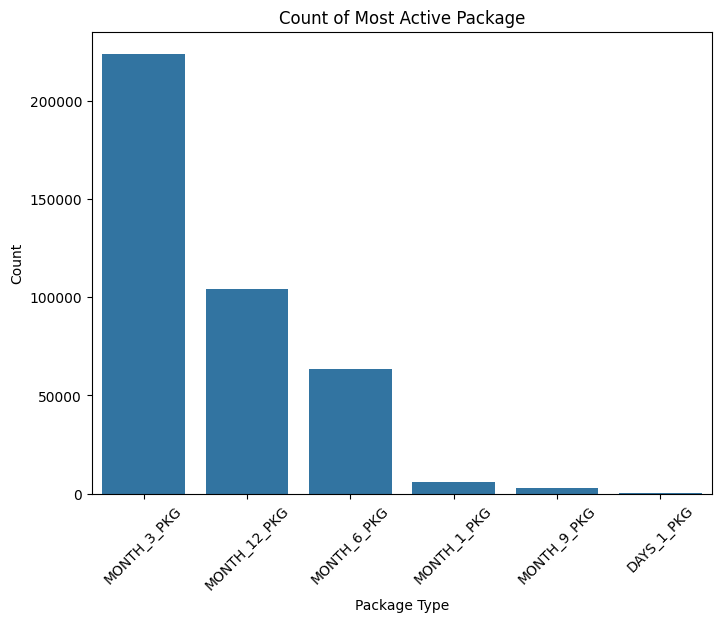

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for MOST_ACTIVE_PKG
value_counts = df_result["MOST_ACTIVE_PKG"].value_counts()

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(x=df_result["MOST_ACTIVE_PKG"], order=value_counts.index)
plt.title('Count of Most Active Package')
plt.xlabel('Package Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [24]:
df_result.drop(columns=['MONTH_12_PKG', 'MONTH_9_PKG',
       'MONTH_6_PKG', 'MONTH_3_PKG', 'MONTH_1_PKG', 'DAYS_1_PKG'],axis=1,inplace=True)

print(df_active.shape)
print("-"*50)
print(df_active.columns)

(400162, 28)
--------------------------------------------------
Index(['AGE', 'PERSON_TYPE', 'GENDER', 'GX', 'PT', 'FT90_P', 'NO_PRGRAM',
       'TOT_SUBS', 'REJOIN_CNT', 'RENEWAL_CNT', 'NEWSALE_CNT', 'FT_CENTER',
       'PRO_CENTER', 'PLUS_CENTER', 'XPRESS_CENTER', 'POPUP_CENTER',
       'HQ_CENTER', 'NO_OF_PRODUCTS', 'OUTAGE', 'SUBS_DAYS', 'OUTAGE_PERC',
       'OUTAGE_TILLNOW', 'CENTER_REGION_CHANGE', 'CITY_CHANGE', 'CHURN',
       'CITY', 'CENTER_REGION', 'MOST_ACTIVE_PKG'],
      dtype='object')


C:\Users\Motasem-PC\AppData\Local\Temp\ipykernel_6416\570067906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_result.drop(columns=['MONTH_12_PKG', 'MONTH_9_PKG',


In [26]:
pd.options.display.max_columns = 500
df_active.head()

,AGE,PERSON_TYPE,GENDER,GX,PT,FT90_P,NO_PRGRAM,TOT_SUBS,REJOIN_CNT,RENEWAL_CNT,NEWSALE_CNT,FT_CENTER,PRO_CENTER,PLUS_CENTER,XPRESS_CENTER,POPUP_CENTER,HQ_CENTER,NO_OF_PRODUCTS,OUTAGE,SUBS_DAYS,OUTAGE_PERC,OUTAGE_TILLNOW,CENTER_REGION_CHANGE,CITY_CHANGE,CHURN,CITY,CENTER_REGION,MOST_ACTIVE_PKG
0,29.0,1,0,1,0,1,1,6,1,4,1,2,0,1,1,0,2,6,433,1872,1.983,200991,1,1,1,0.236589,0.241151,MONTH_12_PKG
4,50.0,0,0,1,1,1,1,5,2,2,1,0,0,5,0,0,0,5,57,1681,0.261,120305,0,0,1,0.203128,0.202731,MONTH_12_PKG
6,30.0,0,0,0,1,0,1,5,1,3,1,1,0,4,0,0,0,5,184,1775,0.782,160702,0,0,1,0.203128,0.202731,MONTH_12_PKG
7,30.0,0,0,0,1,0,1,4,1,2,1,0,0,4,0,0,0,4,710,1113,3.880,51506,1,1,1,0.236589,0.241151,MONTH_6_PKG
11,41.0,0,0,1,1,1,1,15,3,12,0,8,0,6,1,0,0,15,115,2340,1.777,402639,0,1,1,0.205864,0.194171,MONTH_6_PKG


In [27]:
# drop the churn -> All calues 1 -> Active users!
df_active.drop(columns=["CHURN"],axis=1,inplace=True)

C:\Users\Motasem-PC\AppData\Local\Temp\ipykernel_6416\2259821313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_active.drop(columns=["CHURN"],axis=1,inplace=True)


In [28]:
print(df_active.duplicated().sum())
print("-"*50)
print(df_active.isna().sum())

0
--------------------------------------------------
AGE                     0
PERSON_TYPE             0
GENDER                  0
GX                      0
PT                      0
FT90_P                  0
NO_PRGRAM               0
TOT_SUBS                0
REJOIN_CNT              0
RENEWAL_CNT             0
NEWSALE_CNT             0
FT_CENTER               0
PRO_CENTER              0
PLUS_CENTER             0
XPRESS_CENTER           0
POPUP_CENTER            0
HQ_CENTER               0
NO_OF_PRODUCTS          0
OUTAGE                  0
SUBS_DAYS               0
OUTAGE_PERC             0
OUTAGE_TILLNOW          0
CENTER_REGION_CHANGE    0
CITY_CHANGE             0
CITY                    0
CENTER_REGION           0
MOST_ACTIVE_PKG         0
dtype: int64


In [29]:
df_active.to_csv("NBO_golden.csv",index=False)

# Modeling

In [7]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Motasem-PC\Desktop\leejam\data\NBO_golden.csv")
df.head()

,AGE,PERSON_TYPE,GENDER,GX,PT,FT90_P,NO_PRGRAM,TOT_SUBS,REJOIN_CNT,RENEWAL_CNT,...,NO_OF_PRODUCTS,OUTAGE,SUBS_DAYS,OUTAGE_PERC,OUTAGE_TILLNOW,CENTER_REGION_CHANGE,CITY_CHANGE,CITY,CENTER_REGION,MOST_ACTIVE_PKG
0,29.0,1,0,1,0,1,1,6,1,4,...,6,433,1872,1.983,200991,1,1,0.236589,0.241151,MONTH_12_PKG
1,50.0,0,0,1,1,1,1,5,2,2,...,5,57,1681,0.261,120305,0,0,0.203128,0.202731,MONTH_12_PKG
2,30.0,0,0,0,1,0,1,5,1,3,...,5,184,1775,0.782,160702,0,0,0.203128,0.202731,MONTH_12_PKG
3,30.0,0,0,0,1,0,1,4,1,2,...,4,710,1113,3.880,51506,1,1,0.236589,0.241151,MONTH_6_PKG
4,41.0,0,0,1,1,1,1,15,3,12,...,15,115,2340,1.777,402639,0,1,0.205864,0.194171,MONTH_6_PKG


In [9]:
# map
pkg_mapping = {
    'MONTH_12_PKG': 5,
    'MONTH_9_PKG': 4,
    'MONTH_6_PKG': 3,
    'MONTH_3_PKG': 2,
    'MONTH_1_PKG': 1,
    'DAYS_1_PKG': 0
}

df['MOST_ACTIVE_PKG_NUM'] = df['MOST_ACTIVE_PKG'].map(pkg_mapping)
df['MOST_ACTIVE_PKG_NUM'].head()

0    5
1    5
2    5
3    3
4    3
Name: MOST_ACTIVE_PKG_NUM, dtype: int64

In [10]:
df.drop(columns=['MOST_ACTIVE_PKG'],axis=1,inplace=True)
df.columns

Index(['AGE', 'PERSON_TYPE', 'GENDER', 'GX', 'PT', 'FT90_P', 'NO_PRGRAM',
       'TOT_SUBS', 'REJOIN_CNT', 'RENEWAL_CNT', 'NEWSALE_CNT', 'FT_CENTER',
       'PRO_CENTER', 'PLUS_CENTER', 'XPRESS_CENTER', 'POPUP_CENTER',
       'HQ_CENTER', 'NO_OF_PRODUCTS', 'OUTAGE', 'SUBS_DAYS', 'OUTAGE_PERC',
       'OUTAGE_TILLNOW', 'CENTER_REGION_CHANGE', 'CITY_CHANGE', 'CITY',
       'CENTER_REGION', 'MOST_ACTIVE_PKG_NUM'],
      dtype='object')

In [11]:
# split and scaling
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import joblib

# Features and target
X = df.drop(columns=['MOST_ACTIVE_PKG_NUM'])
y = df['MOST_ACTIVE_PKG_NUM']

# Step 2: Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X Train : {X_train.shape}")
print(f"X Test : {X_test.shape}")
print(f"y train : {y_train.shape}")
print(f"y test : {y_test.shape}")

# Step 3: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler as nbo_scaler
scaler_filename = 'nbo_scaler.pkl'
joblib.dump(scaler, scaler_filename)

X Train : (320129, 26)
X Test : (80033, 26)
y train : (320129,)
y test : (80033,)


['nbo_scaler.pkl']

In [ ]:
# Train model

In [12]:
# Required imports
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
from xgboost import XGBClassifier
import matplotlib.pyplot as plt

# Train the XGBoost model
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train_scaled, y_train)

c:\Users\Motasem-PC\Desktop\leejam\venv\lib\site-packages\xgboost\core.py:158: UserWarning: [16:08:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

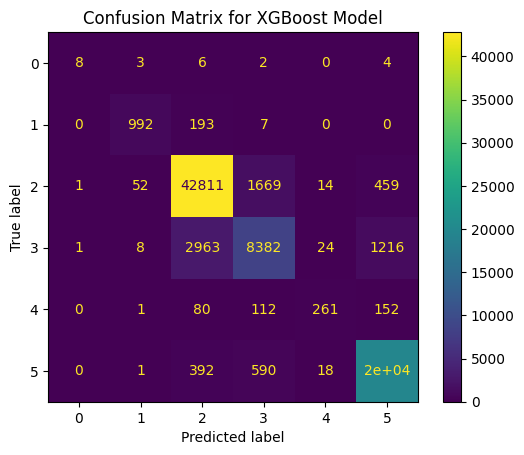

(0.9004410680594255, np.float64(0.8972073366351666))

In [13]:
# Evaluate the model
y_pred = xgb_model.predict(X_test_scaled)

# Calculate accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix for XGBoost Model')
plt.show()

# Output accuracy and F1 score
accuracy, f1

In [14]:
# save model
import joblib

# Save the trained XGBoost model as 'nbo_xgb'
model_filename = 'nbo_xgb.pkl'
joblib.dump(xgb_model, model_filename)


['nbo_xgb.pkl']

In [16]:
# feature importance
import joblib

# Load the saved model
model_filename = r'nbo_xgb.pkl'
xgb_model = joblib.load(model_filename)

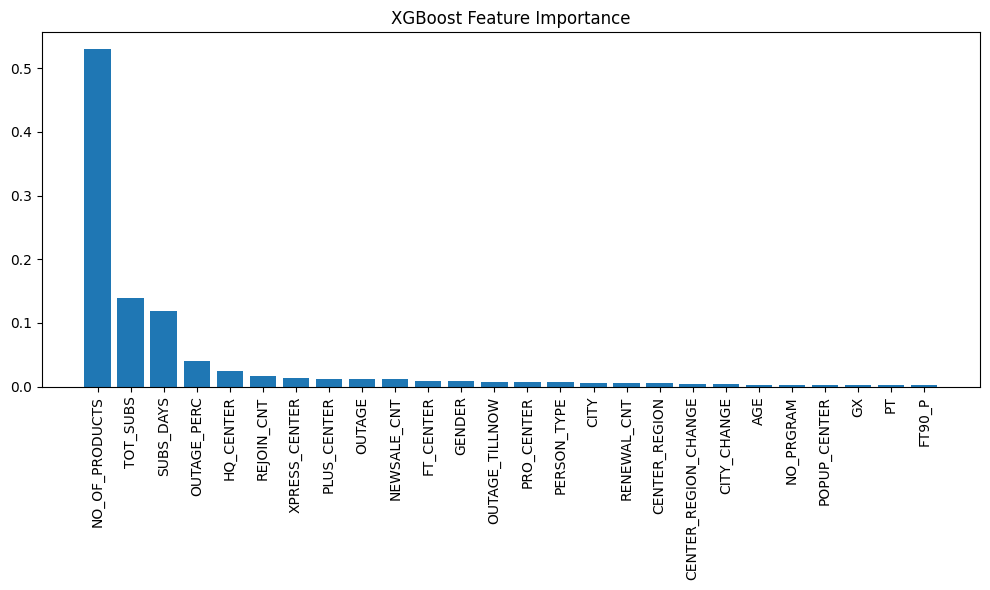

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Function to plot feature importance
def plot_feature_importance(importance, features, model_name):
    indices = np.argsort(importance)[::-1]  # Sort feature importance in descending order
    plt.figure(figsize=(10, 6))
    plt.title(f"{model_name} Feature Importance")
    plt.bar(range(len(features)), importance[indices], align='center')
    plt.xticks(range(len(features)), np.array(features)[indices], rotation=90)
    plt.tight_layout()
    plt.show()

# Get the feature importance from the loaded XGBoost model
xgb_importance = xgb_model.feature_importances_

# Assuming X_train is a DataFrame that was used for training
plot_feature_importance(xgb_importance, X_train.columns, "XGBoost")
